In [26]:
# ██▓███   ▄▄▄       ██▀███   ▄████▄   ██▓ ▄▄▄       ██▓    
# ▓██░  ██▒▒████▄    ▓██ ▒ ██▒▒██▀ ▀█  ▓██▒▒████▄    ▓██▒    
# ▓██░ ██▓▒▒██  ▀█▄  ▓██ ░▄█ ▒▒▓█    ▄ ▒██▒▒██  ▀█▄  ▒██░    
# ▒██▄█▓▒ ▒░██▄▄▄▄██ ▒██▀▀█▄  ▒▓▓▄ ▄██▒░██░░██▄▄▄▄██ ▒██░    
# ▒██▒ ░  ░ ▓█   ▓██▒░██▓ ▒██▒▒ ▓███▀ ░░██░ ▓█   ▓██▒░██████▒
# ▒▓▒░ ░  ░ ▒▒   ▓▒█░░ ▒▓ ░▒▓░░ ░▒ ▒  ░░▓   ▒▒   ▓▒█░░ ▒░▓  ░
# ░▒ ░       ▒   ▒▒ ░  ░▒ ░ ▒░  ░  ▒    ▒ ░  ▒   ▒▒ ░░ ░ ▒  ░
# ░░         ░   ▒     ░░   ░ ░         ▒ ░  ░   ▒     ░ ░   
#               ░  ░   ░     ░ ░       ░        ░  ░    ░  ░
#                            ░                              

In [9]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import sympy as sym 
import random as rand
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import integrate
from scipy.integrate import odeint

In [17]:
def System(r,t):
    
    x,y = r
    dydx = x+2*y 
    
    return np.array([dydx])

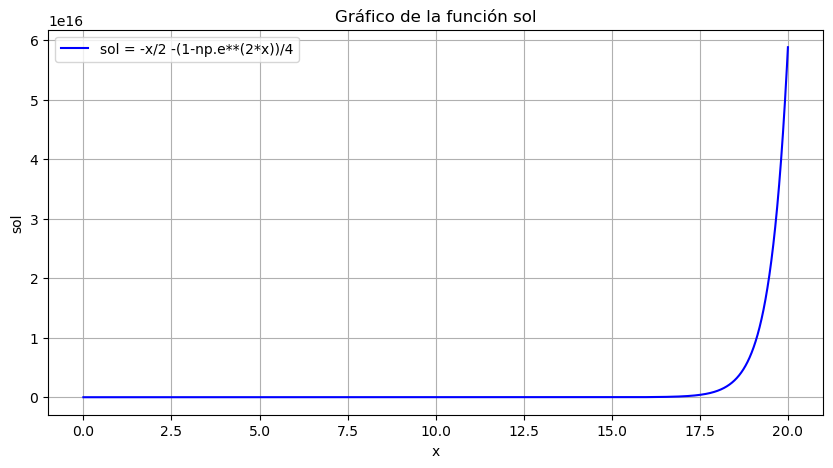

In [19]:
N = 100000
t = np.linspace(0,20,N)

r0 = [0,0]
def sol(x):
    return -(x/2) - (1 - np.e**(2*x))/4


# Calcular los valores correspondientes de sol para cada x
sol_values = sol(t)

# Graficar la función sol
plt.figure(figsize=(10, 5))
plt.plot(t, sol_values, label='sol = -x/2 -(1-np.e**(2*x))/4', color='blue')
plt.title('Gráfico de la función sol')
plt.xlabel('x')
plt.ylabel('sol')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
def Adams(f,r,t):
    h = t[1]-t[0]
    
    x = np.zeros_like(t)
    #y = np.zeros_like(t)
    vx = np.zeros_like(t)
    #vy = np.zeros_like(t)
    
    
    h = t[1] - t[0]
    
    x = np.zeros_like(t)
    #y=np.zeros_like(t)
    vx = np.zeros_like(t)
    #vy=np.zeros_like(t)
    
    
    # Primeros valores
    x[0] = r[0]
    #y[0] = r[1]
    vx[1] = r[1]
    #vy[3] = r[3]
    
    #Rungen Kutta
    for i in range(0,3):
        actual = np.array([x[i], vx[i]])
        #actual = np.array([x[i], y[i], vx[i], vy[i]])
        k1 = f(actual,t[i])
        k2 = f(actual+h*k1/2,t[i]+h/2)
        k3 = f(actual+h*k2/2,t[i]+h/2)
        k4 = f(actual+h*k3,t[i]+h)
        x[i+1] = x[i]+(h/6)*(k1[0]+2*k2[0]+2*k3[0]+k4[0]) 
        #y[i+1] = y[i]+(h/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1]) 
        vx[i+1] = vx[i]+(h/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1]) 
        #vy[i+1] = vy[i]+(h/6)*(k1[3]+2*k2[3]+2*k3[3]+k4[3]) 
        
    
    #copia de los valores
    xc = np.copy(x)
    #yc = np.copy(y)
    vxc = np.copy(vx)
    #vxy = np.copy(vy)
    
    for i in range(4,len(t)):
        
        #Bashford
        
        presente = np.array([x[i-1],vx[i-1]])
        #presente = np.array([x[i-1],y[i-1],vx[i-1],vy[i-1]])
        pasado = np.array([x[i-2],vx[i-2]])
        #pasado = np.array([x[i-2],y[i-2],vx[i-2],vy[i-2]])
        pasado_2 = np.array([x[i-3],vx[i-3]])
        #pasado_2 = np.array([x[i-3],y[i-3],vx[i-3],vy[i-3]])
        pasado_3 = np.array([x[i-4],vx[i-4]])
        #pasado_3 = np.array([x[i-4],y[i-4],vx[i-4],vy[i-4]])
        
        #valores
        k1 = f(presente, t[-1])
        k2 = f(pasado, t[-2])
        k3 = f( pasado_2, t[-3])
        k4 = f(pasado_3, t[-4])
        
        
        x[i] = x[i-1] + h*(55*k1[0] - 59*k2[0] + 37*k3[0] -9*k4[0])/24
        #y[i] = y[i-1] + h*(55*k1[1] - 59*k2[1] + 37*k3[1] -9*k4[1])/24

        vx[i] = vx[i-1] + h*(55*k1[1] - 59*k2[1] + 37*k3[1] -9*k4[1])/24 
        #vy[i] = vy[i-1] + h*(55*k1[3] - 59*k2[3] + 37*k3[3] -9*k4[3])/24 
        
        
 
        #future with my pana Multon
        
        future = np.array([x[i],vx[i]])
        #future = np.array([x[i],y[i],vx[i],vy[i]])
        k5 = f(future,t[i])
        
        
        xc[i] = xc[i-1] + (h/720)*(251*k1[0] + 646*k2[0] -264*k3[0] + 106*k4[0] - 19*k5[0])
        #yc[i] = yc[i-1] + (h/720)*(251*k1[1] + 646*k2[1] -264*k3[1] + 106*k4[1] - 19*k5[1])
        vxc[i] = vxc[i-1] + (h/720)*(251*k1[1] + 646*k2[1] -264*k3[1] + 106*k4[1] - 19*k5[1]) 
        #vyc[i] = vyc[i-1] + (h/720)*(251*k1[3] + 646*k2[3] -264*k3[3] + 106*k4[3] - 19*k5[3])
    
    return x,vx,xc,vxc #x,y,vx,vy,xc,yc,vxc,vyc

In [21]:
sol2 = Adams(System,r0,t)

IndexError: index 1 is out of bounds for axis 0 with size 1

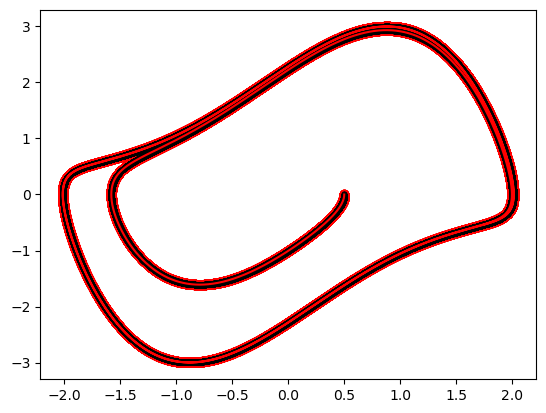

In [16]:
plt.scatter(sol2[0],sol2[1],color='r')
plt.scatter(sol2[2],sol2[3],marker='.',color='k')
plt.plot(sol[:,0],sol[:,1],color="red")


In [31]:
#   ,-.       _,---._ __  / \
#  /  )    .-'       `./ /   \
# (  (   ,'            `/    /|
#  \  `-"             \'\   / |
#  `.              ,  \ \ /  |
#    /`.          ,'-`----Y   |
#   (            ;        |   '
#   |  ,-.    ,-'         |  /
#   |  | (   |   Esteban  | /
#   )  |  \  `.___________|/
#   `--'   `--'

In [32]:
#                                               `.   \
#                                                 \   \
#                                                   .   \
#                                                   :   .
#                       Edward                       |    .
#                                                    |    :
#                                                    |    |
# ..._  ___                                         |    |
# `."".`''''""--..___                              |    |
# ,-\  \             ""-...__         _____________/    |
# / ` " '                    `""""""""                  .
# \                                                      L
# (>                                                      \
# /                                                         \
# \_    ___..---.                                            L
#   `--'         '.                                           \
#                  .                                           \_
#                 _/`.                                           `.._
#              .'     -.                                             `.
#             /     __.-Y     /''''''-...___,...--------.._            |
#            /   _."    |    /                ' .      \   '---..._    |
#           /   /      /    /                _,. '    ,/           |   |
#          /   /      /    /              /''     _,-'            _|   |
#          \_,'     _.'   /               `-----''               /     |
#                  '     /                                    `...-'
#                  `...-' 